In [16]:
import clip
import numpy as np
import importlib
import pandas as pd
import torch
import transformers
from PIL import Image
from pathlib import Path
import os

from sklearn.metrics.pairwise import cosine_similarity
import torch.nn.functional as F
import nomic
from nomic import embed

In [107]:
nomic.login("nk-_7Vi4e6_rZr-nxm_Aj8jvUIC2L51XwJmWduoKPwQZ_M")
output = embed.image(
    images=[
        r"C:\Users\phanm\OneDrive\Pictures\Screenshots\Screenshot 2024-02-07 132638.png",
        r"C:\Users\phanm\OneDrive\Pictures\Screenshots\Screenshot 2024-02-07 132638.png",
    ],
    model='nomic-embed-vision-v1.5',
)

print(output['usage'])
embeddings = np.array(output['embeddings'])
print(embeddings.shape)

{'prompt_tokens': 392, 'total_tokens': 392}
(2, 768)


In [109]:
output = embed.text(
    texts=['Nomic Embedding API', '#keepAIOpen'],
    model='nomic-embed-text-v1.5',
)
print(len(output["embeddings"]))

2


In [78]:
folder_path = Path(r"E:\images")
relevant_folders_path = [folder for folder in folder_path.rglob("*") if folder.is_dir() and folder.name not in ["german", "english"] and "prompt" not in folder.name and "baseline" not in folder.name]
relevant_folders_name = [f"{folder.name}_{folder.parent.name}_{folder.parent.parent.name}" for folder in relevant_folders_path]

In [79]:
relevant_folders_path

[WindowsPath('E:/images/baseline/english/sd1.5'),
 WindowsPath('E:/images/baseline/english/sdcc'),
 WindowsPath('E:/images/baseline/english/sdxl'),
 WindowsPath('E:/images/baseline/german/sd1.5'),
 WindowsPath('E:/images/baseline/german/sdcc'),
 WindowsPath('E:/images/baseline/german/sdxl'),
 WindowsPath('E:/images/long_prompts/english/chatgpt'),
 WindowsPath('E:/images/long_prompts/english/sd1.5'),
 WindowsPath('E:/images/long_prompts/english/sdcc'),
 WindowsPath('E:/images/long_prompts/english/sdxl'),
 WindowsPath('E:/images/long_prompts/german/chatp_gpt'),
 WindowsPath('E:/images/long_prompts/german/sd1.5'),
 WindowsPath('E:/images/long_prompts/german/sdcc'),
 WindowsPath('E:/images/long_prompts/german/sdxl'),
 WindowsPath('E:/images/short_prompts/english/sd1.5'),
 WindowsPath('E:/images/short_prompts/english/sdcc'),
 WindowsPath('E:/images/short_prompts/english/sdxl'),
 WindowsPath('E:/images/short_prompts/german/sd1.5'),
 WindowsPath('E:/images/short_prompts/german/sdcc'),
 Window

In [113]:
def get_text_embeddings(file, embed):
    with open(file, "r") as file:
        data = [line.strip().replace(".", "") for line in file.readlines()]
    output = embed.text(
        texts=data,
        model='nomic-embed-text-v1.5',
    )
    return output["embeddings"]

def get_image_embedding(folder, embed):
    image_list = [str(file) for file in Path(folder).glob("*.*")]
    ouput = embed.image(images=image_list, model='nomic-embed-vision-v1.5')
    print(output["usage"])
    return np.array(output["embeddings"])
def get_cosine_similarity(array1, array2):
    return F.cosine_similarity(torch.tensor([array1]), torch.tensor([array2]))

In [114]:
all_image_embeddings = {}
for folder in relevant_folders_path:
    key = f"{folder.name}_{folder.parent.name}_{folder.parent.parent.name}"
    all_image_embeddings[key] = get_image_embedding(folder, embed)

{'prompt_tokens': 10, 'total_tokens': 10}
{'prompt_tokens': 10, 'total_tokens': 10}
{'prompt_tokens': 10, 'total_tokens': 10}
{'prompt_tokens': 10, 'total_tokens': 10}
{'prompt_tokens': 10, 'total_tokens': 10}


Exception: (400, '{"detail":"You have exceeded your 1000000 free tokens of Nomic Embedding API usage. Enter a payment method at https://atlas.nomic.ai to continue with usage-based billing."}')

In [106]:
all_image_embeddings['sd1.5_english_baseline']

array([-0.0239563 , -0.0117569 , -0.01104736, -0.04550171, -0.04086304,
       -0.03540039, -0.01701355, -0.03573608, -0.02072144, -0.03952026,
       -0.02886963, -0.01644898, -0.02461243, -0.05072021, -0.05126953,
       -0.00484467, -0.00484467, -0.03515625, -0.04754639, -0.03930664,
       -0.04528809, -0.03378296, -0.04153442, -0.01618958, -0.02186584,
       -0.03805542, -0.03829956, -0.00997162, -0.0657959 , -0.01412964,
       -0.03747559, -0.05084229, -0.02430725, -0.03424072, -0.02772522,
       -0.03689575, -0.02841187, -0.03314209, -0.01885986,  0.00173473,
       -0.05627441, -0.00162411, -0.01826477, -0.02023315, -0.05963135,
       -0.02690125, -0.04855347, -0.0168457 , -0.05145264, -0.04699707,
       -0.02928162, -0.04541016, -0.03607178, -0.05172729, -0.03683472,
       -0.04049683, -0.0383606 , -0.04785156, -0.03039551, -0.03900146,
       -0.0635376 , -0.02790833, -0.02496338, -0.0272522 , -0.03131104,
       -0.0221405 , -0.05947876, -0.05484009, -0.03884888, -0.01

In [35]:
english_short_prompts = r"./data/english_metaphors.txt"
english_long_prompts = r"./data/english_metaphor_prompts.txt"
german_short_prompts = r"./data/german_metaphors.txt"
german_long_prompts = r"./data/german_metaphor_prompts_in_german.txt"

all_text_embeddings = {
    "english_short_prompt": get_text_embeddings(english_short_prompts, embed),
    "english_long_prompt": get_text_embeddings(english_long_prompts, embed),
    "german_short_prompt": get_text_embeddings(german_short_prompts, embed),
    "german_long_prompt": get_text_embeddings(german_long_prompts, embed),
}

In [95]:
long_prompts_text_image = {
    "G-GPT": get_cosine_similarity(all_text_embeddings["german_long_prompt"], all_image_embeddings["chatp_gpt_german_long_prompts"]),
    "G-1.5": get_cosine_similarity(all_text_embeddings["german_long_prompt"], all_image_embeddings["sd1.5_german_long_prompts"]),
    "G-XL": get_cosine_similarity(all_text_embeddings["german_long_prompt"], all_image_embeddings["sdxl_german_long_prompts"]),
    "G-CC": get_cosine_similarity(all_text_embeddings["german_long_prompt"], all_image_embeddings["sdcc_german_long_prompts"]),
    "E-GPT": get_cosine_similarity(all_text_embeddings["english_long_prompt"], all_image_embeddings["chatgpt_english_long_prompts"]),
    "E-1.5": get_cosine_similarity(all_text_embeddings["english_long_prompt"], all_image_embeddings["sd1.5_english_long_prompts"]),
    "E-XL": get_cosine_similarity(all_text_embeddings["english_long_prompt"], all_image_embeddings["sdxl_english_long_prompts"]),
    "E-CC": get_cosine_similarity(all_text_embeddings["english_long_prompt"], all_image_embeddings["sdcc_english_long_prompts"]),
}
long_prompts_text_image["G-GPT"].shape

torch.Size([1, 768])

In [104]:
len(all_image_embeddings["chatp_gpt_german_long_prompts"])

768

In [29]:
rows = ['English', 'German']
columns = ['GPT', '1.5', 'XL', 'CC']

df_long = pd.DataFrame(index=rows, columns=columns)

for key, value in long_prompts_text_image.items():
    row, col = key.split('-')
    row = 'English' if row == 'E' else 'German'
    df_long.at[row, col] = value

df_long

,GPT,1.5,XL,CC
English,0.27639,0.17971991,0.2622996,0.26821458
German,0.15986282,0.10510243,0.14344068,0.13495052


In [30]:
short_prompts_text_image = {
    "G-1.5": get_cosine_similarity(all_text_embeddings["german_short_prompt"], all_image_embeddings["sd1.5_german_short_prompts"]).mean().numpy(),
    "G-XL": get_cosine_similarity(all_text_embeddings["german_short_prompt"], all_image_embeddings["sdxl_german_short_prompts"]).mean().numpy(),
    "G-CC": get_cosine_similarity(all_text_embeddings["german_short_prompt"], all_image_embeddings["sdcc_german_short_prompts"]).mean().numpy(),
    "E-1.5": get_cosine_similarity(all_text_embeddings["english_short_prompt"], all_image_embeddings["sd1.5_english_short_prompts"]).mean().numpy(),
    "E-XL": get_cosine_similarity(all_text_embeddings["english_short_prompt"], all_image_embeddings["sdxl_english_short_prompts"]).mean().numpy(),
    "E-CC": get_cosine_similarity(all_text_embeddings["english_short_prompt"], all_image_embeddings["sdcc_english_short_prompts"]).mean().numpy(),
}
short_prompts_text_image

{'G-1.5': array(0.07348605, dtype=float32),
 'G-XL': array(0.0817981, dtype=float32),
 'G-CC': array(0.07938983, dtype=float32),
 'E-1.5': array(0.13103212, dtype=float32),
 'E-XL': array(0.16218022, dtype=float32),
 'E-CC': array(0.1495406, dtype=float32)}

In [47]:
rows = ['English', 'German']
columns = ['1.5', 'XL', 'CC']

df_short = pd.DataFrame(index=rows, columns=columns)

for key, value in short_prompts_text_image.items():
    row, col = key.split('-')
    row = 'English' if row == 'E' else 'German'
    df_short.at[row, col] = value

df_short

,1.5,XL,CC
English,0.13103212,0.16218022,0.1495406
German,0.073486045,0.0817981,0.079389825


In [32]:
import torch
import torch.nn.functional as F

# Compute pairwise cosine similarity
def compute_cosine_similarity(embeddings_list):
    n = len(embeddings_list)
    similarity_matrix = torch.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            if i == j:
                similarity = 1.0  # Cosine similarity with itself is always 1
            else:
                similarity = get_cosine_similarity(embeddings_list[i], embeddings_list[j]).mean().item()
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity
    
    return similarity_matrix

name_list = [folder for folder in relevant_folders_name if "long" in folder]
embedding_list_long = {key: item for key, item in all_image_embeddings.items() if "long" in key}
embedding_list_short = {key: item for key, item in all_image_embeddings.items() if "short" in key}
# Compute pairwise cosine similarities
similarity_matrix_long_prompts = compute_cosine_similarity(list(embedding_list_long.values()))
similarity_matrix_short_prompts = compute_cosine_similarity(list(embedding_list_short.values()))

In [33]:
similarity_matrix_long_prompts

tensor([[1.0000, 0.5758, 0.7414, 0.7328, 0.5827, 0.4397, 0.5203, 0.5087],
        [0.5758, 1.0000, 0.6384, 0.6517, 0.4952, 0.5663, 0.4942, 0.5081],
        [0.7414, 0.6384, 1.0000, 0.7987, 0.5806, 0.4897, 0.5882, 0.5550],
        [0.7328, 0.6517, 0.7987, 1.0000, 0.5816, 0.4760, 0.5546, 0.5657],
        [0.5827, 0.4952, 0.5806, 0.5816, 1.0000, 0.5128, 0.6405, 0.6407],
        [0.4397, 0.5663, 0.4897, 0.4760, 0.5128, 1.0000, 0.5429, 0.5613],
        [0.5203, 0.4942, 0.5882, 0.5546, 0.6405, 0.5429, 1.0000, 0.6904],
        [0.5087, 0.5081, 0.5550, 0.5657, 0.6407, 0.5613, 0.6904, 1.0000]])

In [34]:
similarity_matrix_short_prompts

tensor([[1.0000, 0.5470, 0.5597, 0.5427, 0.4457, 0.4525],
        [0.5470, 1.0000, 0.6463, 0.4575, 0.5761, 0.4943],
        [0.5597, 0.6463, 1.0000, 0.4411, 0.5044, 0.4954],
        [0.5427, 0.4575, 0.4411, 1.0000, 0.5007, 0.5173],
        [0.4457, 0.5761, 0.5044, 0.5007, 1.0000, 0.6034],
        [0.4525, 0.4943, 0.4954, 0.5173, 0.6034, 1.0000]])

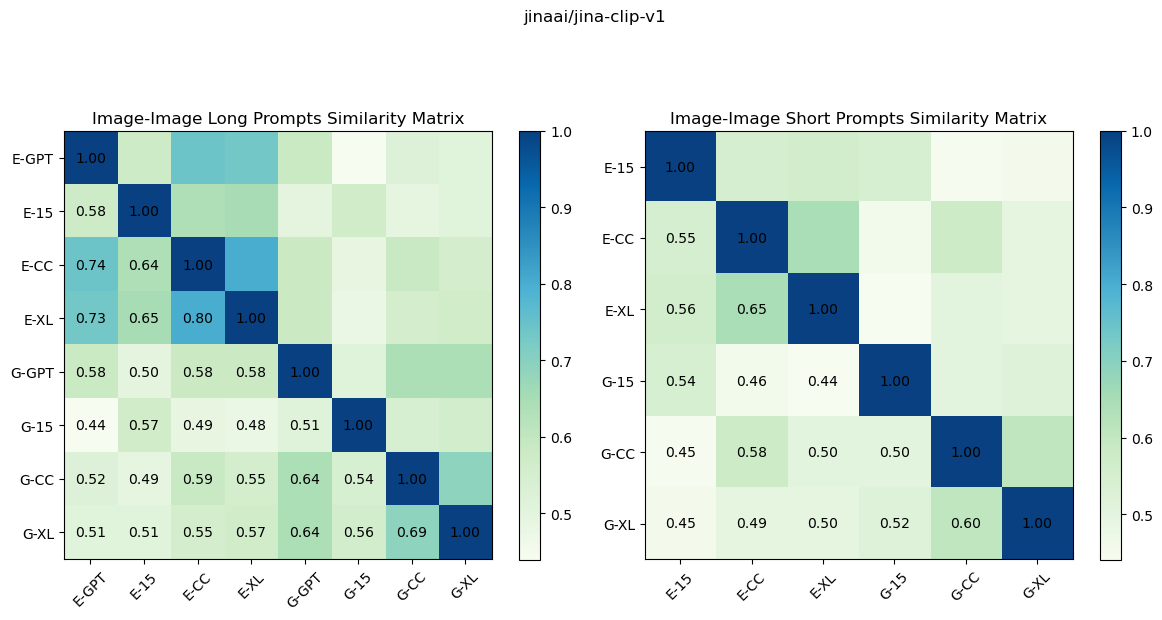

In [68]:
import matplotlib.pyplot as plt

# Plot the similarity matrix as heatmap
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.imshow(similarity_matrix_long_prompts, cmap='GnBu', interpolation='nearest')
plt.colorbar(shrink=0.64)
plt.title('Image-Image Long Prompts Similarity Matrix')
plt.xticks(range(8), ['E-GPT', 'E-15', 'E-CC', 'E-XL', 'G-GPT', 'G-15', 'G-CC', 'G-XL'], rotation=45)
plt.yticks(range(8), ['E-GPT', 'E-15', 'E-CC', 'E-XL', 'G-GPT', 'G-15', 'G-CC', 'G-XL'])
masked_matrix = np.triu(np.ones_like(similarity_matrix_long_prompts, dtype=bool))
for i in range(masked_matrix.shape[0]):
    for j in range(masked_matrix.shape[1]):
        if i >= j:  # Only annotate the lower triangle
            plt.text(j, i, f"{similarity_matrix_long_prompts[i, j]:.2f}", ha='center', va='center', color='black')

plt.subplot(1, 2, 2)
plt.imshow(similarity_matrix_short_prompts, cmap='GnBu', interpolation='nearest')
plt.colorbar(shrink=0.64)
plt.title('Image-Image Short Prompts Similarity Matrix')
plt.xticks(range(6), ['E-15', 'E-CC', 'E-XL', 'G-15', 'G-CC', 'G-XL'], rotation=45)
plt.yticks(range(6), ['E-15', 'E-CC', 'E-XL', 'G-15', 'G-CC', 'G-XL'])
masked_matrix = np.triu(np.ones_like(similarity_matrix_short_prompts, dtype=bool))
for i in range(masked_matrix.shape[0]):
    for j in range(masked_matrix.shape[1]):
        if i >= j:  # Only annotate the lower triangle
            plt.text(j, i, f"{similarity_matrix_short_prompts[i, j]:.2f}", ha='center', va='center', color='black')
plt.tight_layout()
plt.suptitle("jinaai/jina-clip-v1")
plt.savefig("image_to_image_similarity_jina_clip.png", dpi=160, bbox_inches='tight')
plt.show()

In [37]:
def display_images_side_by_side(img1, img2, resize_to=None):
    if resize_to is not None:
        img1 = img1.resize(resize_to)
        img2 = img2.resize(resize_to)

    # Create a new blank image with the appropriate size
    total_width = img1.width + img2.width
    max_height = max(img1.height, img2.height)
    new_img = Image.new('RGB', (total_width, max_height))

    # Paste the images into the new image
    new_img.paste(img1, (0, 0))
    new_img.paste(img2, (img1.width, 0))

    # Display the combined image
    display(new_img)

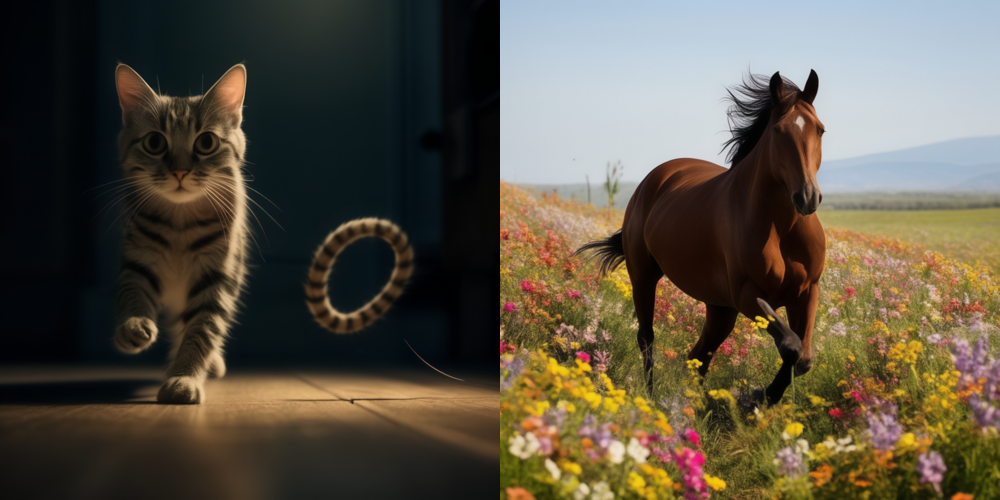

In [38]:
images = [
    Image.open(r"./A cat chasing a mouse in a dark room.png"),
    Image.open(r"./A horse running through a field of flowers.png")
]
images_2 = [
    Image.open(r"./A cat chasing a mouse in a dark room v2.png"),
    Image.open(r"./A horse running through a field of flowers v2.png")
]
texts = [
    "A cat chasing a mouse in a dark room.png",
    "A horse running through a field of flowers.png"
]
sample_image_embeddings = model.encode_image(images)
sample_image_embeddings_2 = model.encode_image(images_2)
sample_text_embeddings = model.encode_text(texts)
display_images_side_by_side(images[0], images[1], (500,500))

In [39]:
print(sample_text_embeddings[0] @ sample_text_embeddings[1].T) # text embedding similarity
print(sample_text_embeddings[0] @ sample_image_embeddings[0].T) # text-image cross-modal similarity
print(sample_text_embeddings[0] @ sample_image_embeddings[1].T) # text-image cross-modal similarity
print(sample_text_embeddings[1] @ sample_image_embeddings[0].T) # text-image cross-modal similarity
print(sample_text_embeddings[1] @ sample_image_embeddings[1].T)# text-image cross-modal similarity

0.39768183
0.27680022
0.04215855
0.017394338
0.33806455


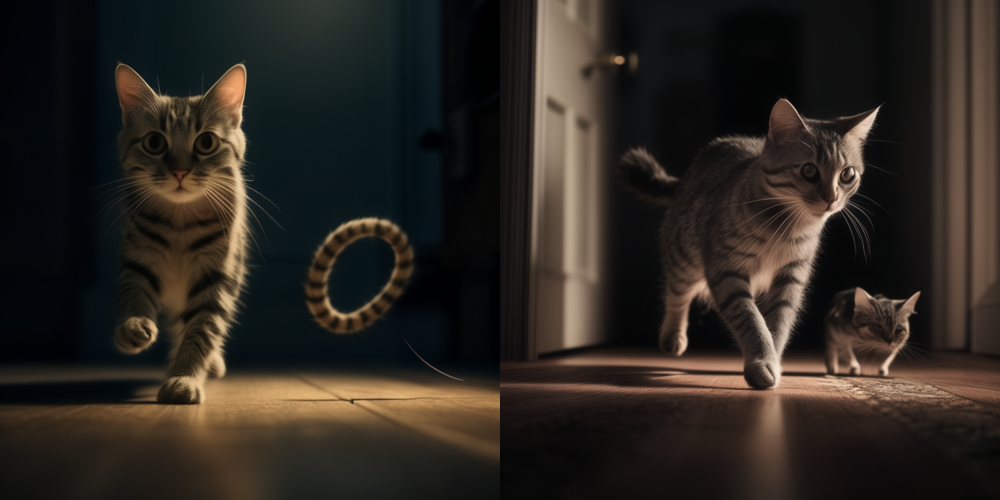

0.8548957


In [40]:
display_images_side_by_side(images[0], images_2[0], (500,500))
print(sample_image_embeddings_2[0] @ sample_image_embeddings[0].T)# text-image cross-modal similarity

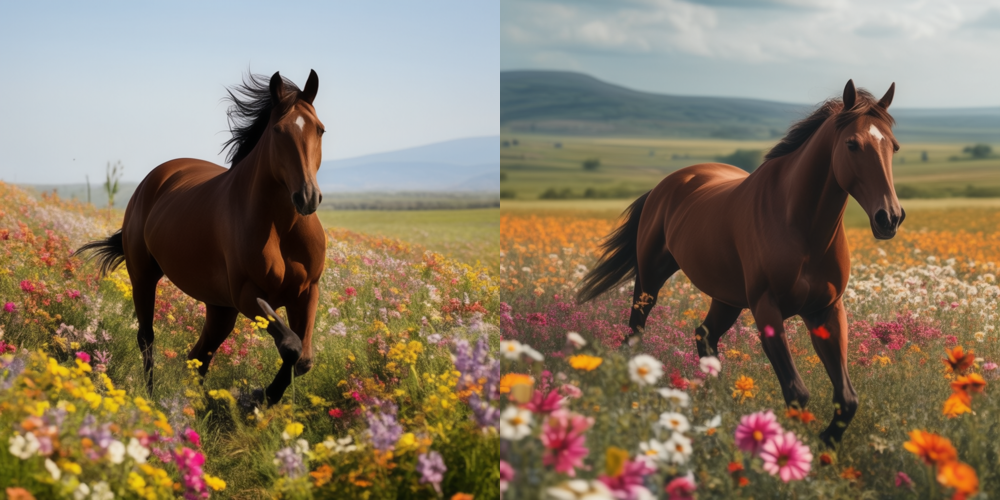

0.9671905


In [41]:
display_images_side_by_side(images[1], images_2[1], (500,500))
print(sample_image_embeddings_2[1] @ sample_image_embeddings[1].T)# text-image cross-modal similarity

In [42]:
sentences = ['A blue cat', 'A red cat']

# Public image URLs
image_urls = [
    'https://i.pinimg.com/600x315/21/48/7e/21487e8e0970dd366dafaed6ab25d8d8.jpg',
    'https://i.pinimg.com/736x/c9/f2/3e/c9f23e212529f13f19bad5602d84b78b.jpg'
]

# Encode text and images
text_embeddings = model.encode_text(sentences)
image_embeddings = model.encode_image(image_urls)  # also accepts PIL.image, local filenames, dataURI

# Compute similarities
print(text_embeddings[0] @ text_embeddings[1]) # text embedding similarity
print(text_embeddings[0] @ image_embeddings[0]) # text-image cross-modal similarity
print(text_embeddings[0] @ image_embeddings[1]) # text-image cross-modal similarity
print(text_embeddings[1] @ image_embeddings[0]) # text-image cross-modal similarity
print(text_embeddings[1] @ image_embeddings[1])# text-image cross-modal similarity

0.5635972
0.29137558
0.058404483
0.13053647
0.29263002


In [43]:
baseline_text_embedding = get_text_embeddings(r"./baseline_text.txt", model)
baseline_text_german_embedding = get_text_embeddings(r"./baseline_text_german.txt", model)

In [44]:
baseline_image_embedding = {
    "E-1.5": get_image_embedding("E:/images/baseline/english/sd1.5/", model),
    "E-XL": get_image_embedding("E:/images/baseline/english/sdxl/", model),
    "E-CC": get_image_embedding("E:/images/baseline/english/sdcc/", model),
    "G-1.5": get_image_embedding("E:/images/baseline/german/sd1.5/", model),
    "G-XL": get_image_embedding("E:/images/baseline/german/sdxl/", model),
    "G-CC": get_image_embedding("E:/images/baseline/german/sdcc/", model),
}

In [45]:
baseline_text_image_score = {
    "E-1.5": get_cosine_similarity(baseline_text_embedding, baseline_image_embedding["E-1.5"]).mean().numpy(),
    "E-XL": get_cosine_similarity(baseline_text_embedding, baseline_image_embedding["E-XL"]).mean().numpy(),
    "E-CC": get_cosine_similarity(baseline_text_embedding, baseline_image_embedding["E-CC"]).mean().numpy(),
    "G-1.5": get_cosine_similarity(baseline_text_german_embedding, baseline_image_embedding["G-1.5"]).mean().numpy(),
    "G-XL": get_cosine_similarity(baseline_text_german_embedding, baseline_image_embedding["G-XL"]).mean().numpy(),
    "G-CC": get_cosine_similarity(baseline_text_german_embedding, baseline_image_embedding["G-CC"]).mean().numpy(),    
}
baseline_text_image_score

{'E-1.5': array(0.21523112, dtype=float32),
 'E-XL': array(0.28106996, dtype=float32),
 'E-CC': array(0.27808487, dtype=float32),
 'G-1.5': array(0.12417302, dtype=float32),
 'G-XL': array(0.1643935, dtype=float32),
 'G-CC': array(0.1499694, dtype=float32)}

In [56]:
rows = ['English', 'German']
columns = ['1.5', 'XL', 'CC']

df_baseline = pd.DataFrame(index=rows, columns=columns)
df_baseline["GPT"] = [None, None]
for key, value in baseline_text_image_score.items():
    row, col = key.split('-')
    row = 'English' if row == 'E' else 'German'
    df_baseline.at[row, col] = value
df_baseline = df_baseline.reindex(columns=["GPT", "1.5", "XL", "CC"])
df_baseline

,GPT,1.5,XL,CC
English,None,0.21523112,0.28106996,0.27808487
German,None,0.12417302,0.1643935,0.1499694


In [48]:
df_long

,GPT,1.5,XL,CC
English,0.27639,0.17971991,0.2622996,0.26821458
German,0.15986282,0.10510243,0.14344068,0.13495052


In [57]:
df_short["GPT"] = [None, None]
df_short = df_short.reindex(columns=["GPT", "1.5", "XL", "CC"])
df_short

,GPT,1.5,XL,CC
English,None,0.13103212,0.16218022,0.1495406
German,None,0.073486045,0.0817981,0.079389825


In [59]:
df_baseline['DataFrame'] = 'Baseline'
df_long['DataFrame'] = 'Long prompts'
df_short['DataFrame'] = 'Short prompts'

In [67]:
final_df = pd.concat([df_baseline, df_long, df_short], keys=["Baseline", "Long prompts", "Short prompts"], names=["Jina Clip"]).drop(columns='DataFrame')
final_df

GPT          1.5          XL           CC
Jina Clip                                                              
Baseline      English        None   0.21523112  0.28106996   0.27808487
              German         None   0.12417302   0.1643935    0.1499694
Long prompts  English     0.27639   0.17971991   0.2622996   0.26821458
              German   0.15986282   0.10510243  0.14344068   0.13495052
Short prompts English        None   0.13103212  0.16218022    0.1495406
              German         None  0.073486045   0.0817981  0.079389825